# Analytical computation of the dynamics of the groudnwater level in land between parallel ditches

See report "Regionale modellering van waterbalansen en grondwater regime Waternet: Matlab-implementatie van de bakjes-modellering"

Theo Olsthoorn
27 januari 2011

The implementation is in Python instead of in Matlab

## Hoofdstuk 2
Analytische oplossingen voor de grondwaterstroming ter verificatie van het model

### Niet-stationaire éénlaagsoplossingen zonder lek

De formule wordt toegeschreven aan Kraaijenhof - Van der Leur (Verruijt, 1999, p87), maar hij staat ook in Carslaw and Jaeger (1959, p97, vergelijking 8)

In [50]:
import matplotlib.pyplot as plt
import numpy as np

In [51]:
h0, A, kD, mu, L = 0, 1.0, 500, 0.25, 200

A is the initial head (at t = 0). However A can be interpreted as the result of a sudden shower of $P$ [L] using
$$ A = \frac {N dt} \mu = \frac P \mu$$

In [52]:
def hx(A, kD, mu, L, t, n=101, TOL=1e-6):
    '''Return h(x, t) relative to initial head equal to zero'''
    T = L**2 * mu / (np.pi**2 * kD) # characteristic system time
    x = np.linspace(-L/2, +L/2, n)  # points to compute h

    DH = 0.
    for j in range(1, 100):
        j2m1 = 2 * j - 1
        dh = (-1)**(j-1) / j2m1 * np.cos(j2m1 * np.pi * x / L) * np.exp(-j2m1**2 * t / T)
        DH += dh
        if np.all(np.abs(dh)) < TOL:
            break
    return A * 4 / np.pi * DH, x  # x is included in the output tuple

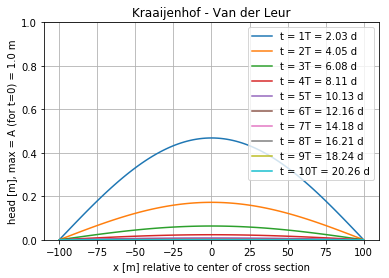

In [54]:
# implementation, example

T = L**2 * mu / (np.pi**2 * kD)
m  = 10 # number of times
times = np.linspace(0, m * T, m + 1)[1:] # 1, 2, 3 ... 10 * T

n = 101 # number of x points between -L/2 and L/2
x = np.linspace(-L/2, L/2, n)

fig, ax = plt.subplots()
ax.set_title('Kraaijenhof - Van der Leur')
ax.set_xlabel('x [m] relative to center of cross section')
ax.set_ylabel('head [m], max = A (for t=0) = {:.1f} m'.format(A))
ax.set_ylim((0, A))
ax.grid()

for t in times:
    hx_, x = hx(A, kD, mu, L, t, n)
    ax.plot(x, h0 + hx_, label='t = {:.0f}T = {:.2f} d'.format(t/T, t))
ax.legend()
    
plt.show()

The example shows the development of the head in the cross section as it declines from an initial uniform level A. The times are both in terms of the characteristic time of the system and in days.

The average head in the cross section is computed using equation 2.6. It is implemented here.


### Step response

The step response shows what happens when continuous precipitation sets in at t=0. We can compare it with the results of a succession of step responses each happening at the beginning of the next time step. Both must be about the same. The impulse response is obtained by setting $A = N dt / \mu = P/\mu$. Below we implement the result of a series of impulse responses followed by the step response.

In [ ]:
def IRhx(N, kD, mu, L, t, n=101, TOL=1e-6)
    '''Return restult of impulse response of P=N dt on cross section at the start of each time step
    
    parameters
        N: recharge, assumed continuous.
        t: total simulation time. It is divided into steps.
    '''
    times = np.linspace(0, t, 21) # break-up total time
    DT    = np.diff(times) # divide given time in 20 timesteps
    x     = np.linspace(-L/2, L/2, n)
    ht    = np.zeros((len(times), len(x))) # store the results
    for i, dt in enumerate(DT): 
        A = N * dt/mu # step response result at beginning of time step
        ht[i+1, :], _ = ht[i, :] + hm(A, kD, mu, L, dt, n=101, TOL=1e-6)

In [38]:
def hm(A, kD, mu, L, t, TOL=1e-6):
    '''Return h(x, t)'''
    T = L**2 * mu / (np.pi**2 * kD) # characteristic system time

    DH = 0.
    for j in range(1, 100):
        j2m1 = 2 * j - 1
        dh = 1 / j2m1**4 * (1 - np.exp(-j2m1**2 * t / T))
        DH += dh
        if dh < TOL:
            break
    return A * 4 / np.pi * DH

0.295226162476059 0.8235222131419807
0.10860359164242815 1.1196085705619134
0.039953028103555235 1.2285319409536757
0.014697897651781245 1.268602609495877
0.005407054374532331 1.2833437846465376
0.0019891441416865566 1.288766759923173
0.0007317652352530987 1.2907617610374282
0.00026920138581359895 1.2914956809324765
9.903365537568463e-05 1.2917656749733317
3.643244579677207e-05 1.2918650002302012


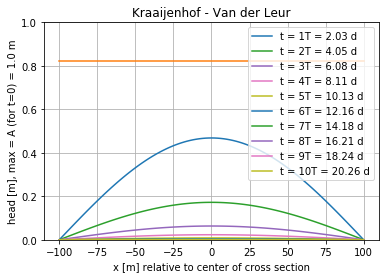

In [47]:
fig, ax = plt.subplots()
ax.set_title('Kraaijenhof - Van der Leur')
ax.set_xlabel('x [m] relative to center of cross section')
ax.set_ylabel('head [m], max = A (for t=0) = {:.1f} m'.format(A))
ax.set_ylim((0, A))
ax.grid()

for t in times:
    hx_, x = hx(h0, A, kD, mu, L, t, n)
    hm_ = hm(h0, A, kD, mu, L, t)
    ax.plot(x, hx_, label='t = {:.0f}T = {:.2f} d'.format(t/T, t))
    #ax.plot([x[0], x[-1]], [np.mean(hx_), np.mean(hx_)])
    ax.plot([x[0], x[-1]], [hm_, hm_], '-')
    print(np.mean(hx_), hm_)
ax.legend()
    
plt.show()